In [54]:
import os
import numpy as np
import csv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2
import statistics

# 1

In [8]:
BMY= pd.read_csv("BMY.csv")
DAL= pd.read_csv("DAL.csv")
MGM= pd.read_csv("MGM.csv")
WELL= pd.read_csv("WELL.csv")

## 1.1

In [18]:
print('BMY Adj Close X Close: ' + str(sum(BMY['Adj Close']==BMY['Close'])-sum(BMY['Adj Close']!=BMY['Close'])))
print('DAL Adj Close X Close: ' + str(sum(DAL['Adj Close']==DAL['Close'])-sum(DAL['Adj Close']!=DAL['Close'])))
print('MGM Adj Close X Close: ' + str(sum(MGM['Adj Close']==MGM['Close'])-sum(MGM['Adj Close']!=MGM['Close'])))
print('WELL Adj Close X Close: ' + str(sum(WELL['Adj Close']==WELL['Close'])-sum(WELL['Adj Close']!=WELL['Close'])))

BMY Adj Close X Close: -1205
DAL Adj Close X Close: 123
MGM Adj Close X Close: -791
WELL Adj Close X Close: -899


None of these companies has no differences between the Adj Close and Close columns.

## 1.2

In [43]:
print('Higest Adj Close value of BMY is ' + str(max(BMY['Adj Close'])) + ' and the lowest is ' + str(min(BMY['Adj Close'])))
print('Higest Adj Close value of DAL is ' + str(max(DAL['Adj Close'])) + ' and the lowest is ' + str(min(DAL['Adj Close'])))
print('Higest Adj Close value of MGM is ' + str(max(MGM['Adj Close'])) + ' and the lowest is ' + str(min(MGM['Adj Close'])))
print('Higest Adj Close value of BMY is ' + str(max(WELL['Adj Close'])) + ' and the lowest is ' + str(min(WELL['Adj Close'])))


Higest Adj Close value of BMY is 79.9800033569336 and the lowest is 38.68001937866211
Higest Adj Close value of DAL is 62.26396942138672 and the lowest is 19.190000534057617
Higest Adj Close value of MGM is 50.36706161499024 and the lowest is 7.136050224304199
Higest Adj Close value of BMY is 98.30999755859376 and the lowest is 30.795509338378903


## 1.3

In [51]:
BMY['Log Adj Close'] = np.log(BMY['Adj Close'])
DAL['Log Adj Close'] = np.log(DAL['Adj Close'])
MGM['Log Adj Close'] = np.log(MGM['Adj Close'])
WELL['Log Adj Close'] = np.log(WELL['Adj Close'])


In [55]:
print('Max Log Adj Close value of BMY is ' + str(max(BMY['Log Adj Close'])) +', MEAN is ' + str(statistics.mean(BMY['Log Adj Close'])) + ', MEDIAN is ' + str(statistics.median(BMY['Log Adj Close'])) + ' and the MIN is ' + str(min(BMY['Log Adj Close'])))
print('Max Log Adj Close value of DAL is ' + str(max(DAL['Log Adj Close'])) +', MEAN is ' + str(statistics.mean(DAL['Log Adj Close'])) + ', MEDIAN is ' + str(statistics.median(DAL['Log Adj Close'])) + ' and the MIN is ' + str(min(DAL['Log Adj Close'])))
print('Max Log Adj Close value of MGM is ' + str(max(MGM['Log Adj Close'])) +', MEAN is ' + str(statistics.mean(MGM['Log Adj Close'])) + ', MEDIAN is ' + str(statistics.median(MGM['Log Adj Close'])) + ' and the MIN is ' + str(min(MGM['Log Adj Close'])))
print('Max Log Adj Close value of BMY is ' + str(max(WELL['Log Adj Close'])) +', MEAN is ' + str(statistics.mean(WELL['Log Adj Close'])) + ', MEDIAN is ' + str(statistics.median(WELL['Log Adj Close'])) + ' and the MIN is ' + str(min(WELL['Log Adj Close'])))


Max Log Adj Close value of BMY is 4.3817766453908344, MEAN is 4.01558363727825, MEDIAN is 4.027260486198744 and the MIN is 3.6553231715845054
Max Log Adj Close value of DAL is 4.131382918544714, MEAN is 3.762153551016783, MEDIAN is 3.831463520724189 and the MIN is 2.954389337849604
Max Log Adj Close value of MGM is 3.919337422042254, MEAN is 3.400257333942054, MEDIAN is 3.420760140451357 and the MIN is 1.9651594334121614
Max Log Adj Close value of BMY is 4.58812572654508, MEAN is 4.184544524301816, MEDIAN is 4.219421197564084 and the MIN is 3.4273688786475893


## 1.4

In [75]:
print('Highest loss of BMY Log Adj Close is on ' + BMY['Date'][BMY['Log Adj Close'].idxmin()] + 'and Highest gain of BMY Log Adj Close is on ' + BMY['Date'][BMY['Log Adj Close'].idxmax()])
print('Highest loss of DAL Log Adj Close is on ' + DAL['Date'][DAL['Log Adj Close'].idxmin()] + 'and Highest gain of DAL Log Adj Close is on ' + DAL['Date'][DAL['Log Adj Close'].idxmax()])
print('Highest loss of MGM Log Adj Close is on ' + MGM['Date'][MGM['Log Adj Close'].idxmin()] + 'and Highest gain of MGM Log Adj Close is on ' + MGM['Date'][MGM['Log Adj Close'].idxmax()])
print('Highest loss of WELL Log Adj Close is on ' + WELL['Date'][WELL['Log Adj Close'].idxmin()] + 'and Highest gain of WELL Log Adj Close is on ' + WELL['Date'][WELL['Log Adj Close'].idxmax()])

Highest loss of BMY Log Adj Close is on 2019-07-22and Highest gain of BMY Log Adj Close is on 2022-11-08
Highest loss of DAL Log Adj Close is on 2020-05-15and Highest gain of DAL Log Adj Close is on 2019-07-24
Highest loss of MGM Log Adj Close is on 2020-03-18and Highest gain of MGM Log Adj Close is on 2021-11-05
Highest loss of WELL Log Adj Close is on 2020-03-18and Highest gain of WELL Log Adj Close is on 2022-03-29


## 1.5

In [82]:
BMY1 = BMY
BMY1['Date'] = pd.to_datetime(BMY1['Date']) - pd.to_timedelta(7, unit='d')
BMY1 = BMY1.groupby([pd.Grouper(key='Date', freq='W')])['Volume'].sum()
print("BMY's weekly average volume is " + str(BMY1.mean()))

BMY's weekly average volume is 57651194.636015326


In [83]:
DAL1 = DAL
DAL1['Date'] = pd.to_datetime(DAL1['Date']) - pd.to_timedelta(7, unit='d')
DAL1 = DAL1.groupby([pd.Grouper(key='Date', freq='W')])['Volume'].sum()
print("DAL's weekly average volume is " + str(DAL1.mean()))

DAL's weekly average volume is 65931494.636015326


In [84]:
MGM1 = MGM
MGM1['Date'] = pd.to_datetime(MGM1['Date']) - pd.to_timedelta(7, unit='d')
MGM1 = MGM1.groupby([pd.Grouper(key='Date', freq='W')])['Volume'].sum()
print("MGM's weekly average volume is " + str(MGM1.mean()))

MGM's weekly average volume is 45264744.061302684


In [85]:
WELL1 = WELL
WELL1['Date'] = pd.to_datetime(WELL1['Date']) - pd.to_timedelta(7, unit='d')
WELL1 = WELL1.groupby([pd.Grouper(key='Date', freq='W')])['Volume'].sum()
print("WELL's weekly average volume is " + str(WELL1.mean()))

WELL's weekly average volume is 11867465.90038314


## 1.6

In [90]:
returns = ((1 + BMY1.ffill().pct_change())
            .cumprod()
            .iloc[-1])
print('BMY total returns are ' + str(returns))
returns = ((1 + DAL1.ffill().pct_change())
            .cumprod()
            .iloc[-1])
print('DAL total returns are ' + str(returns))
returns = ((1 + MGM1.ffill().pct_change())
            .cumprod()
            .iloc[-1])
print('MGM total returns are ' + str(returns))
returns = ((1 + WELL1.ffill().pct_change())
            .cumprod()
            .iloc[-1])
print('WELL total returns are ' + str(returns))

BMY total returns are 2.700292105157855
DAL total returns are 1.522927464313089
MGM total returns are 1.0184321784220145
WELL total returns are 2.0587448089811264


Highest total returns has **BMY**

## 1.7

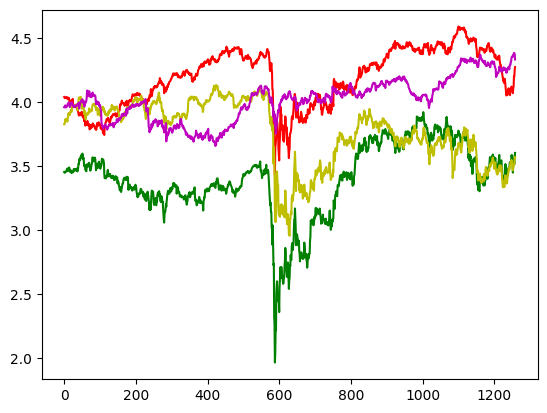

In [95]:
plt.plot(MGM['Log Adj Close'], 'g', WELL['Log Adj Close'], 'r', DAL['Log Adj Close'], 'y', BMY['Log Adj Close'], 'm')
plt.show()